# Patient Survival After One Year of Treatment

### About the dataset

The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

- Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
- Survived_1_year == 1, implies that the patient survived after 1 year of treatment


### Data Description

- **ID_Patient_Care_Situation**: Care situation of a patient during treatment
- **Diagnosed_Condition**: The diagnosed condition of the patient
- **ID_Patient**: Patient identifier number
- **Treatment_with_drugs**: Class of drugs used during treatment
- **Survived_1_year**: If the patient survived after one year (0 means did not survive; 1 means survived)
- **Patient_Age**: Age of the patient
- **Patient_Body_Mass_Index**: A calculated value based on the patient’s weight, height, etc.
- **Patient_Smoker**: If the patient was a smoker or not
- **Patient_Rural_Urban**: If the patient stayed in Rural or Urban part of the country
- **Previous_Condition**: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns  A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing data
pharma_data = pd.read_csv("Training_set_advance.csv",header=0,index_col=None)
# print first 5 rows of dataset
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [3]:
# print last 5 rows of dataset
pharma_data.tail()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
25074,3233,2,2491,Dx3 dx4,33,20.825297,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1
25075,31394,21,2806,DX2,60,22.679810,YES,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
25076,28315,18,11733,DX4 DX5,51,19.952023,YES,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
25077,1338,4,8577,dx5,21,20.681303,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25078,16072,18,10629,DX2 DX3,54,21.830371,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [4]:
# print information about dataset including the index dtype and columns, non-null values and memory usage.
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

In [5]:
# print dimensionality of dataset which has 25079 rows, 18 columns
pharma_data.shape

(25079, 18)

In [6]:
# print summary statistics of dataset
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,25079.000000
mean,16509.925396,26.382631,6237.758523,33.193548,23.439952,0.894111,0.136028,0.183409,0.083716,0.396240,0.054420,0.000337,1.748261,0.634316
std,9536.958469,15.096967,3603.338849,19.507617,3.778849,0.307702,0.342826,0.387009,0.276968,0.489126,0.226849,0.018361,0.770324,0.481631
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8220.000000,13.000000,3125.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16466.000000,26.000000,6228.000000,33.000000,23.369168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24784.000000,40.000000,9356.500000,50.000000,26.730785,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33013.000000,52.000000,12514.000000,142.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


## -------------------------------------------------------------------------------------------------------------------------------------

### Data Preprocessing

We will check unique values ,missing values of all object type columns and preprocess them if necessary

In [7]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [8]:
# check the unique values of column
pharma_data["Treated_with_drugs"].unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


In [9]:
# remove spaces at the beginning and end of the string and transform it to uppercase
pharma_data['Treated_with_drugs']=pharma_data['Treated_with_drugs'].str.strip().str.upper()

In [10]:
# check the unique values of column
pharma_data["Treated_with_drugs"].unique()

array(['DX2', 'DX6', 'DX1', 'DX1 DX3 DX4', 'DX5', 'DX2 DX5', 'DX3 DX5',
       'DX1 DX3', 'DX3 DX4', 'DX3', 'DX2 DX3', 'DX4', 'DX1 DX2 DX3 DX5',
       'DX3 DX4 DX5', 'DX1 DX5', 'DX2 DX4', 'DX2 DX3 DX4', 'DX4 DX5',
       'DX1 DX3 DX5', 'DX1 DX4', 'DX1 DX2', 'DX1 DX2 DX4 DX5',
       'DX1 DX2 DX3', 'DX1 DX4 DX5', 'DX1 DX2 DX4', 'DX1 DX2 DX5',
       'DX2 DX4 DX5', 'DX2 DX3 DX5', nan, 'DX1 DX2 DX3 DX4',
       'DX1 DX3 DX4 DX5', 'DX2 DX3 DX4 DX5', 'DX1 DX2 DX3 DX4 DX5'],
      dtype=object)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# check the unique values of column
pharma_data["Patient_Smoker"].unique()

array(['NO', 'NO ', 'YES', 'YES ', 'YESS ', 'YESS', 'Cannot say ',
       'Cannot say', 'CANNOT SAY ', 'CANNOT SAY'], dtype=object)

In [12]:
# remove spaces at the beginning and end of the string and transform it to uppercase
pharma_data['Patient_Smoker']=pharma_data['Patient_Smoker'].str.strip().str.upper().replace({'YESS': 'YES'})

In [13]:
# check the unique values of column
pharma_data["Patient_Smoker"].unique()

array(['NO', 'YES', 'CANNOT SAY'], dtype=object)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
# check the unique values of column
pharma_data["Patient_Rural_Urban"].unique()

array(['URBAN', 'RURAL'], dtype=object)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
# check the unique values of column
pharma_data["Patient_mental_condition"].unique()

array(['Stable'], dtype=object)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
# check null value counts of each column
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

In [17]:
# check data type of each column
pharma_data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

# Drop Duplicate Values

In [18]:
pharma_data.duplicated().sum()

1982

In [19]:
pharma_data.shape

(25079, 18)

In [20]:
pharma_data.drop_duplicates(inplace=True)
pharma_data.shape

(23097, 18)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
# check null value counts of each column
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1267
B                            1267
C                            1267
D                            1267
E                            1267
F                            1267
Z                            1267
Number_of_prev_cond          1267
Survived_1_year                 0
dtype: int64

#### Filling Missing Values

In [22]:
# count all values of the selected column
pharma_data["Treated_with_drugs"].value_counts()

DX6                    8637
DX5                    1921
DX2                    1901
DX4                    1857
DX1                    1828
DX3                    1808
DX1 DX2                 424
DX2 DX4                 420
DX2 DX3                 420
DX3 DX4                 415
DX3 DX5                 414
DX4 DX5                 409
DX2 DX5                 406
DX1 DX5                 406
DX1 DX4                 398
DX1 DX3                 397
DX1 DX2 DX4             100
DX1 DX3 DX4             100
DX1 DX2 DX5              98
DX2 DX3 DX5              96
DX3 DX4 DX5              96
DX2 DX3 DX4              95
DX1 DX3 DX5              91
DX1 DX4 DX5              87
DX1 DX2 DX3              86
DX2 DX4 DX5              83
DX1 DX2 DX3 DX4          23
DX1 DX3 DX4 DX5          21
DX1 DX2 DX4 DX5          19
DX2 DX3 DX4 DX5          18
DX1 DX2 DX3 DX5          12
DX1 DX2 DX3 DX4 DX5       3
Name: Treated_with_drugs, dtype: int64

In [23]:
# print the most frequently occurring value of the column
print(pharma_data["Treated_with_drugs"].mode()[0])
# replace null values with mode
pharma_data.loc[:, ('Treated_with_drugs')].replace(np.nan, pharma_data["Treated_with_drugs"].mode()[0], inplace=True )

DX6


##### since DX6 is most used vaccine to cure patient we will fill the missing values present in 'Treated_with_drugs'  with DX6

In [24]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1267
B                            1267
C                            1267
D                            1267
E                            1267
F                            1267
Z                            1267
Number_of_prev_cond          1267
Survived_1_year                 0
dtype: int64

In [25]:
pharma_data.shape

(23097, 18)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
print('patient who have symptoms of "A" : ')
print(pharma_data["A"].value_counts())
print()
print('patient who have symptoms of "B" : ')
print(pharma_data["B"].value_counts())
print()
print('patient who have symptoms of "C" : ')
print(pharma_data["C"].value_counts())
print()
print('patient who have symptoms of "D" : ')
print(pharma_data["D"].value_counts())
print()
print('patient who have symptoms of "E" : ')
print(pharma_data["E"].value_counts())
print()
print('patient who have symptoms of "F" : ')
print(pharma_data["F"].value_counts())
print()
print('patient who have symptoms of "Z" : ')
print(pharma_data["Z"].value_counts())

patient who have symptoms of "A" : 
1.0    19534
0.0     2296
Name: A, dtype: int64

patient who have symptoms of "B" : 
0.0    18836
1.0     2994
Name: B, dtype: int64

patient who have symptoms of "C" : 
0.0    17825
1.0     4005
Name: C, dtype: int64

patient who have symptoms of "D" : 
0.0    20007
1.0     1823
Name: D, dtype: int64

patient who have symptoms of "E" : 
0.0    13185
1.0     8645
Name: E, dtype: int64

patient who have symptoms of "F" : 
0.0    20649
1.0     1181
Name: F, dtype: int64

patient who have symptoms of "Z" : 
0.0    21822
1.0        8
Name: Z, dtype: int64


In [27]:
pharma_data["Number_of_prev_cond"].value_counts()

1.0    9409
2.0    8947
3.0    3044
4.0     395
5.0      35
Name: Number_of_prev_cond, dtype: int64

In [28]:
# replace null values with mode
pharma_data.loc[:, ('A')].replace(np.nan, pharma_data["A"].mode()[0], inplace=True )
pharma_data.loc[:, ('B')].replace(np.nan, pharma_data["B"].mode()[0], inplace=True )
pharma_data.loc[:, ('C')].replace(np.nan, pharma_data["C"].mode()[0], inplace=True )
pharma_data.loc[:, ('D')].replace(np.nan, pharma_data["D"].mode()[0], inplace=True )
pharma_data.loc[:, ('E')].replace(np.nan, pharma_data["E"].mode()[0], inplace=True )
pharma_data.loc[:, ('F')].replace(np.nan, pharma_data["F"].mode()[0], inplace=True )
pharma_data.loc[:, ('Z')].replace(np.nan, pharma_data["Z"].mode()[0], inplace=True )

In [29]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                               0
B                               0
C                               0
D                               0
E                               0
F                               0
Z                               0
Number_of_prev_cond          1267
Survived_1_year                 0
dtype: int64

In [30]:
# Calculating the sum of previous condition columns
prev_cond_columns = ['A', 'B', 'C', 'D', 'E', 'F', 'Z']
pharma_data["Number_of_prev_cond"] = pharma_data[prev_cond_columns].sum(axis=1)
pharma_data.head(10)


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,7895,51,848,DX1 DX3 DX4,20,23.438528,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
6,17785,49,6663,DX5,5,23.882432,NO,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
7,343,35,248,DX2,45,17.059734,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,11729,36,8098,DX6,43,22.182933,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
9,15319,15,10018,DX6,60,17.956259,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


In [31]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
# check the unique values of column
pharma_data["Patient_Age"].unique()

array([ 60,   2,  20,   8,  53,   5,  45,  43,  21,  66,  37,  18,  15,
        39,  48,  32,  58,  25,   3,  14,   0,  57,  62,   1,  16,  44,
        42,  40,  27,  29,  12,  50,  36,  33,  28,  13,  17,  22,  31,
        63,  61,  35,  38,  23,   6,  26,  59,  65,  64,  51,   9,  30,
         4,  24,  46,  19,  55,  56,  49,  54,  52,  41,  11,   7,  10,
        34,  47, 135, 112, 142, 132, 121, 125, 123], dtype=int64)

In [33]:
# display the rows has a patient age of 0
pharma_data[pharma_data["Patient_Age"] == 0].shape

(385, 18)

In [34]:
# Calculating the mode of the 'Age' column
age_mode = pharma_data["Patient_Age"].mode()[0]
age_mode

31

In [35]:
# Filling zero values in the 'Age' column with the mode
pharma_data["Patient_Age"].replace(0, age_mode, inplace=True)

In [36]:
# display the rows has a patient age of 0
pharma_data[pharma_data["Patient_Age"] == 0].shape

(0, 18)

In [37]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,17738,24,136,DX6,28,20.549522,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23093,23398,17,697,DX6,60,25.495394,YES,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0
23094,22526,33,9007,DX4,6,28.902132,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,19416,30,11467,DX2 DX4 DX5,43,23.236669,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0


###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Visualization

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


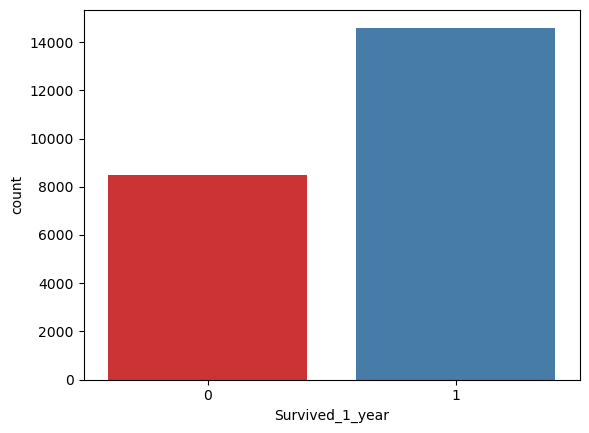

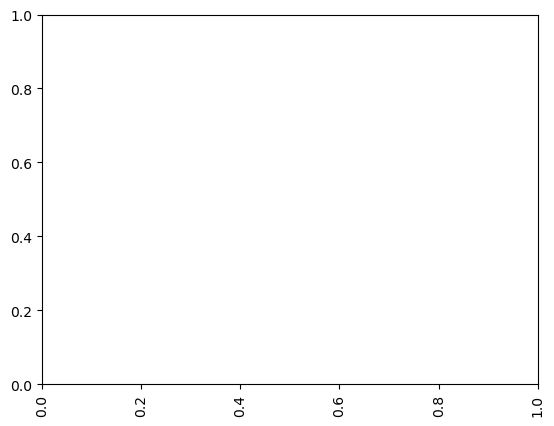

In [39]:
#countplot are useful to visualize the frequency distribution of a single 
#discrete/categorical variable
# countplot showing the count of patients in each category of 'Survived_1_year'
sns.countplot(x='Survived_1_year',data=pharma_data,palette="Set1")

#Rotate x-labels
plt.show()
plt.xticks(rotation=90);

In [40]:
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

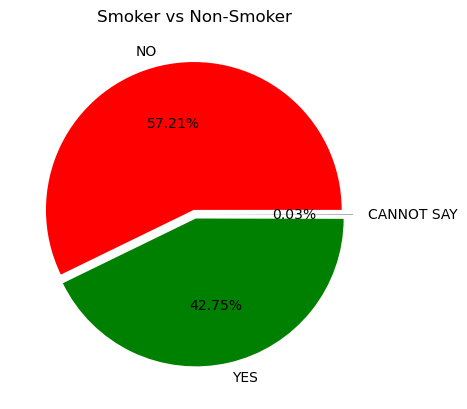

In [41]:
# Pie chart showing the percentage of smokers and non-smokers among the patients
smoker_counts = pharma_data['Patient_Smoker'].value_counts()
plt.pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.2f%%',colors=['red','green','black'],
        explode=[0.03,0.03,0.07])
plt.title('Smoker vs Non-Smoker')
plt.show()

In [42]:
# print the patient counts by smoking condition based on survived patient counts 
pharma_data.groupby("Patient_Smoker").agg({"Survived_1_year": "count"}).sort_values("Survived_1_year",ascending=False).head(10)

,Survived_1_year
Patient_Smoker,
NO,13214
YES,9875
CANNOT SAY,8


In [43]:
pharma_data['Patient_Smoker'].value_counts()

NO            13214
YES            9875
CANNOT SAY        8
Name: Patient_Smoker, dtype: int64

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

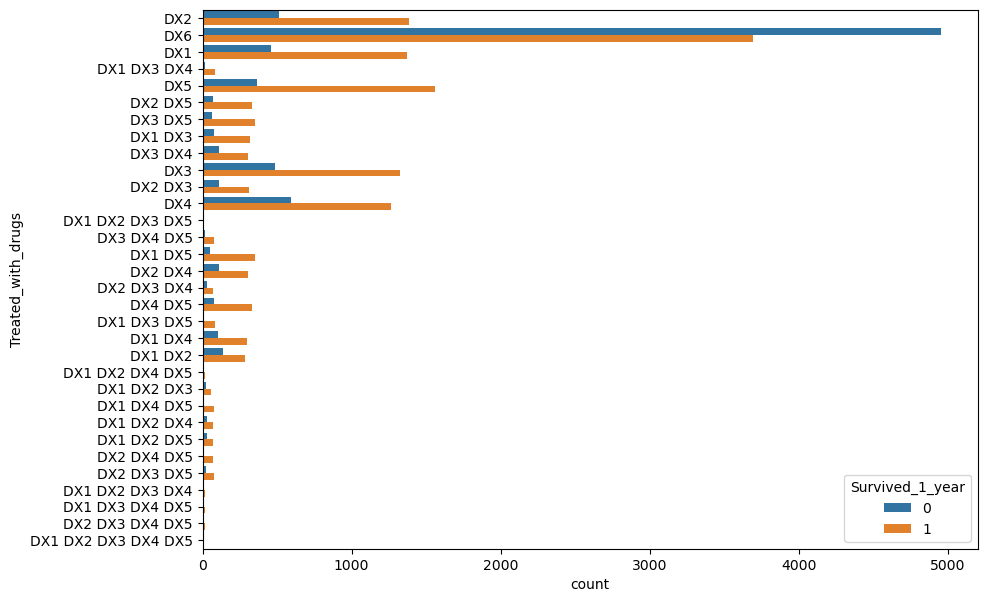

In [44]:
# Show the counts of treated drugs based on 'survived 1 year'
plt.figure(figsize=(10, 7))
sns.countplot(y="Treated_with_drugs", hue="Survived_1_year", data=pharma_data)
plt.show()

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

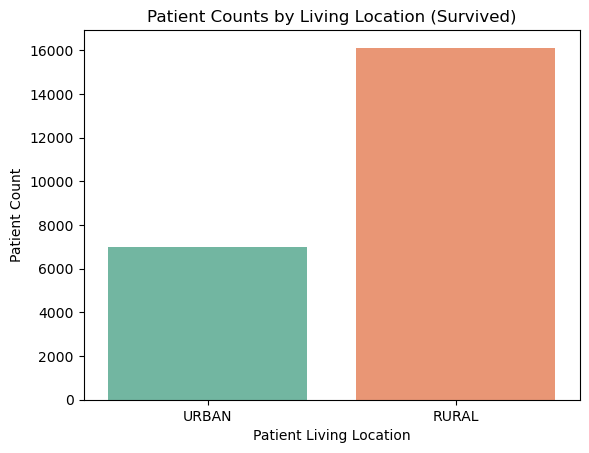

In [45]:
# countplot showing the patient counts by living locations condition based on survived patient counts

sns.countplot(x='Patient_Rural_Urban',data=pharma_data,palette="Set2")
plt.xlabel("Patient Living Location")
plt.ylabel("Patient Count")
plt.title("Patient Counts by Living Location (Survived)")
plt.show()

In [46]:
# print the patient counts by living locations condition based on survived patient counts 
pharma_data.groupby("Patient_Rural_Urban").agg({"Survived_1_year": "count"}).sort_values("Survived_1_year",ascending=False).head(10)

,Survived_1_year
Patient_Rural_Urban,
RURAL,16116
URBAN,6981


In [47]:
pharma_data['Patient_Rural_Urban'].value_counts()

RURAL    16116
URBAN     6981
Name: Patient_Rural_Urban, dtype: int64

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [48]:
# print the patient counts by living locations condition based on survived patient counts 
pharma_data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Since A,B,C,D,E,Fand Z are the symptoms/condition of patient before treatment.  Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient do not have that condition, it is 0 and same for other conditions.


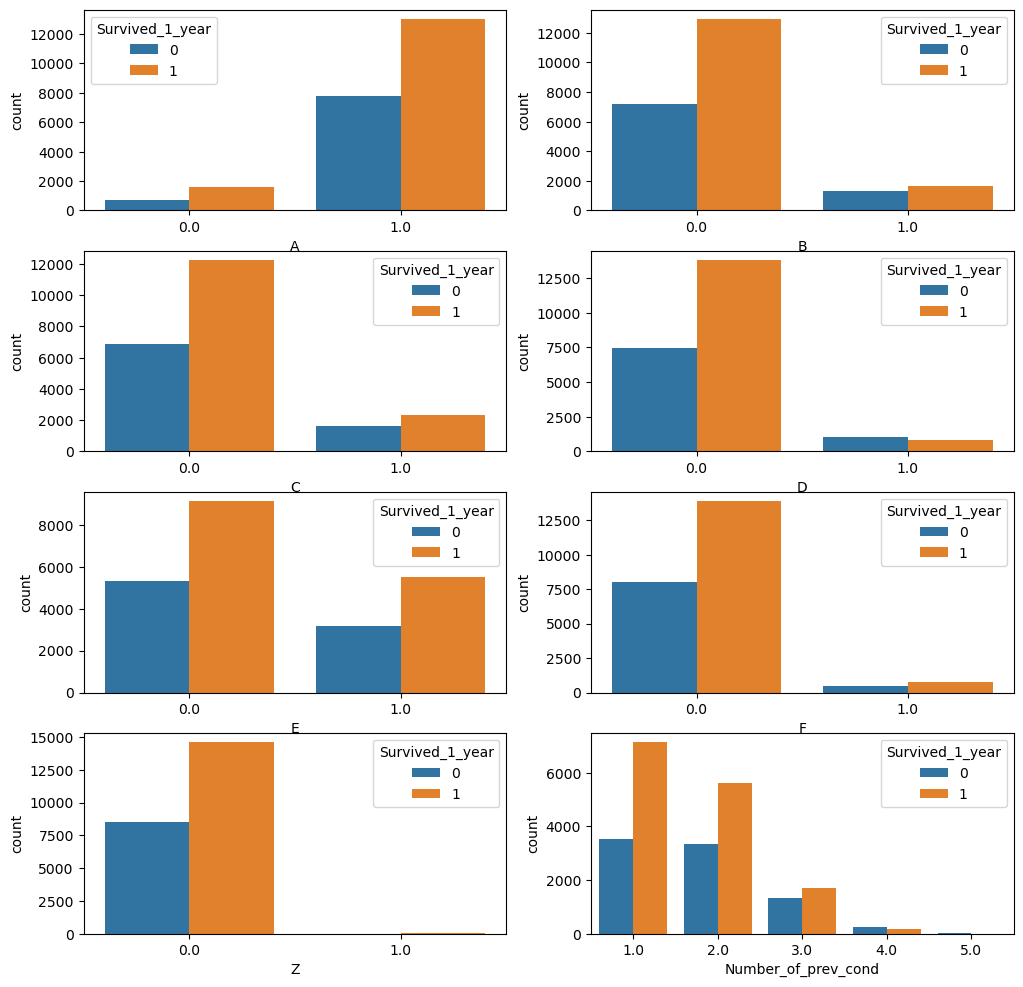

In [49]:
# Show the counts of previous conditions based on survived 1 year
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

sns.countplot(x="A", hue="Survived_1_year", data=pharma_data, ax=ax[0,0])
sns.countplot(x="B", hue="Survived_1_year", data=pharma_data, ax=ax[0,1])
sns.countplot(x="C", hue="Survived_1_year", data=pharma_data, ax=ax[1,0])
sns.countplot(x="D", hue="Survived_1_year", data=pharma_data, ax=ax[1,1])
sns.countplot(x="E", hue="Survived_1_year", data=pharma_data, ax=ax[2,0])
sns.countplot(x="F", hue="Survived_1_year", data=pharma_data, ax=ax[2,1])
sns.countplot(x="Z", hue="Survived_1_year", data=pharma_data, ax=ax[3,0])
sns.countplot(x="Number_of_prev_cond", hue="Survived_1_year", data=pharma_data, ax=ax[3,1])

print()
print('Since A,B,C,D,E,Fand Z are the symptoms/condition of patient before treatment.',
      ' Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A.',
      'If the patient do not have that condition, it is 0 and same for other conditions.')
plt.show()

In [50]:
# print the patient counts by sum of previous condition based on survived patient counts 
pharma_data.groupby("Number_of_prev_cond").agg({"Survived_1_year": "count"}).sort_values("Survived_1_year",ascending=False).head(10)

,Survived_1_year
Number_of_prev_cond,
1.0,10676
2.0,8947
3.0,3044
4.0,395
5.0,35


###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model Building

In [51]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [52]:
# transforming categorical variable into an numerical variable
#  converting of cars_training data

from sklearn.preprocessing import LabelEncoder
colname= ['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']

le=LabelEncoder()

for x in colname:
    pharma_data[x]=le.fit_transform(pharma_data[x])

In [53]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,16,60,21.655523,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,31,2,28.852743,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,31,20,26.179725,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,31,8,22.638945,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,0,53,21.326131,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
### feature selection

In [55]:
pharma_data.drop('ID_Patient_Care_Situation',axis=1,inplace=True)
pharma_data.head()

,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,47,8433,16,60,21.655523,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,3,2972,31,2,28.852743,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,7,8608,31,20,26.179725,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,31,10074,31,8,22.638945,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,43,7462,0,53,21.326131,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [56]:
pharma_data.drop('Patient_ID',axis=1,inplace=True)
pharma_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,47,16,60,21.655523,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,3,31,2,28.852743,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,7,31,20,26.179725,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,31,31,8,22.638945,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,43,0,53,21.326131,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

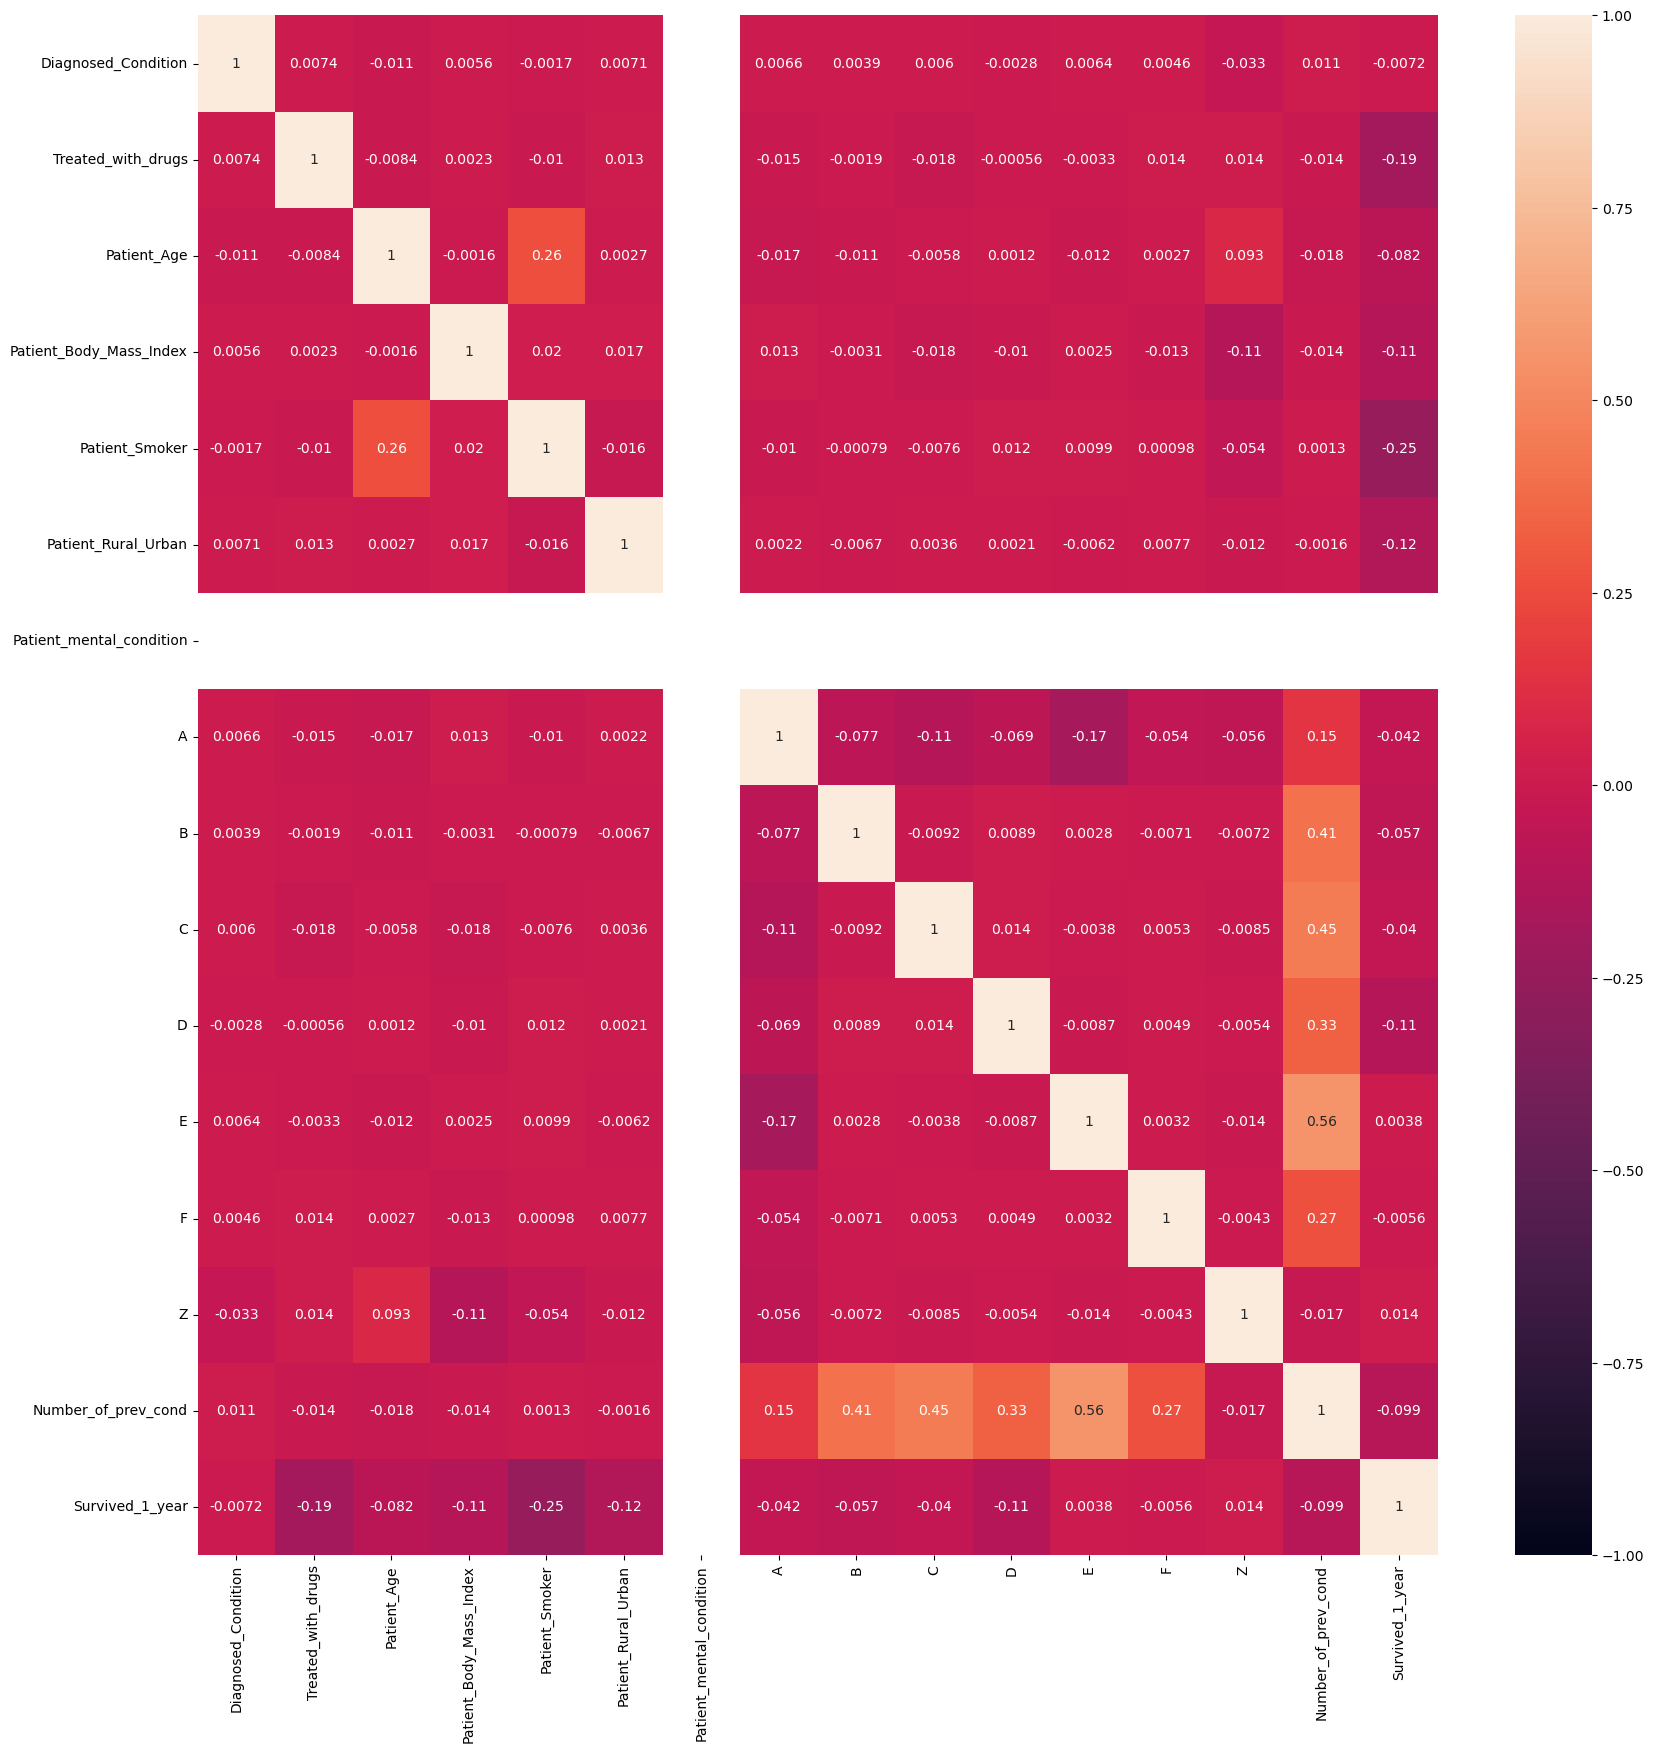

In [57]:
corr_df=pharma_data.corr()
#print(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

In [58]:
pharma_data.drop('Patient_mental_condition',axis=1,inplace=True)
pharma_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,47,16,60,21.655523,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,3,31,2,28.852743,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,7,31,20,26.179725,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,31,31,8,22.638945,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,43,0,53,21.326131,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [59]:
pharma_data.shape

(23097, 15)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [60]:
# creating X and Y

X = pharma_data.values[:,0:-1]
Y = pharma_data.values[:,-1]
Y = Y.astype(int)

print(X.shape)
print(Y.shape)

(23097, 14)
(23097,)


In [61]:
Y

array([1, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)

X = scaler.transform(X)


In [63]:
# splitting the data into 80 - 20 %

from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [64]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18477, 14)
(18477,)
(4620, 14)
(4620,)


In [65]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier=LogisticRegression(random_state=10)
#train the model object
classifier.fit(X_train,Y_train)# fit function is used to train the model
Y_pred= classifier.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 756  930]
 [ 405 2529]]
Classification report: 
              precision    recall  f1-score   support

           0       0.65      0.45      0.53      1686
           1       0.73      0.86      0.79      2934

    accuracy                           0.71      4620
   macro avg       0.69      0.66      0.66      4620
weighted avg       0.70      0.71      0.70      4620

Accuracy of the model:  0.711038961038961


### approach to build the pipeline of model i.e. to check which algorithm is best

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(kernel="rbf", gamma=0.1,C=1,random_state=10)
logreg=LogisticRegression(random_state=10)


In [84]:
# now, create a list with the objects 
models= [tree, knn, svm, logreg]

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

for model in models:
    model.fit(X_train, Y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[1122  564]
 [ 546 2388]]
The accuracy of the  DecisionTreeClassifier  model is  75.97402597402598
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      1686
           1       0.81      0.81      0.81      2934

    accuracy                           0.76      4620
   macro avg       0.74      0.74      0.74      4620
weighted avg       0.76      0.76      0.76      4620



[[1015  671]
 [ 491 2443]]
The accuracy of the  KNeighborsClassifier  model is  74.84848484848486
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.64      1686
           1       0.78      0.83      0.81      2934

    accuracy                           0.75      4620
   macro avg       0.73      0.72      0.72      4620
weighted avg       0.74      0.75      0.75      4620



[[ 991  695]
 [ 347 2587]]
The accuracy of the  SVC  model is  77.44588744588745
Classification 

##### Here SVC model is giving us better accuracy than other model so we will go with svc model

In [89]:
from sklearn.svm import SVC
model= SVC(kernel="rbf", gamma=0.1,C=10,random_state=10)
model.fit(X_train, Y_train)
Y_pred= model.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1041  645]
 [ 384 2550]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1686
           1       0.80      0.87      0.83      2934

    accuracy                           0.78      4620
   macro avg       0.76      0.74      0.75      4620
weighted avg       0.77      0.78      0.77      4620

Accuracy of the model:  0.7772727272727272


even after tunning the accuracy is not improving as much so we will go with other models

### ------------------------------------------------------------------------------------------------------------------------------

In [72]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion = 'gini',random_state=10,splitter='best',max_depth=10,min_samples_leaf=4)

# fit the model on the data and predict the values

model_DT.fit(X_train,Y_train)
Y_pred= model_DT.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1219  467]
 [ 422 2512]]
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1686
           1       0.84      0.86      0.85      2934

    accuracy                           0.81      4620
   macro avg       0.79      0.79      0.79      4620
weighted avg       0.81      0.81      0.81      4620

Accuracy of the model:  0.8075757575757576


In [74]:
# predicting using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=150,random_state=10,bootstrap=True,n_jobs=1)

# fit the model on the data and predict the values

modelRF.fit(X_train,Y_train)
Y_pred= modelRF.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1205  481]
 [ 358 2576]]
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1686
           1       0.84      0.88      0.86      2934

    accuracy                           0.82      4620
   macro avg       0.81      0.80      0.80      4620
weighted avg       0.82      0.82      0.82      4620

Accuracy of the model:  0.8183982683982683


In [76]:
# predicting using the Gradien boosting classifier

from xgboost import XGBClassifier

model_XGB = XGBClassifier(n_estimators=50,random_state=10)

# fit the model on the data and predict the values

model_XGB.fit(X_train,Y_train)

Y_pred = model_XGB.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1221  465]
 [ 317 2617]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1686
           1       0.85      0.89      0.87      2934

    accuracy                           0.83      4620
   macro avg       0.82      0.81      0.81      4620
weighted avg       0.83      0.83      0.83      4620

Accuracy of the model:  0.8307359307359308


In [106]:
# predicting using the Gradien boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting = GradientBoostingClassifier(n_estimators=300,random_state=10)

# fit the model on the data and predict the values

model_GradientBoosting.fit(X_train,Y_train)

Y_pred = model_GradientBoosting.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1215  471]
 [ 301 2633]]
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1686
           1       0.85      0.90      0.87      2934

    accuracy                           0.83      4620
   macro avg       0.82      0.81      0.82      4620
weighted avg       0.83      0.83      0.83      4620

Accuracy of the model:  0.8329004329004329


#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------